In [73]:
# Step 1: Define the Problem
#    - We have a dataset of iris plants (three different types),
#      and the goal is to separate these plants into distinct
#      groups based on their characteristics.
#    - I'm thinking this is going to be a classic logistic regression problem.
#
# Roughly following along here: http://machinelearningmastery.com/get-your-hands-dirty-with-scikit-learn-now/

# Import Numpy and Pandas
import numpy as np
import pandas as pd

# Import the datasets & models
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
# Load the Iris dataset
# The dataset is a dictionary with keys 'target_names', 'data', 'target', 'DESCR', and 'feature_names'
dataset = datasets.load_iris()
for x in dataset:
    print x

target_names
data
target
DESCR
feature_names


In [75]:
# Print the description of the dataset
print dataset.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [76]:
# Taking a look at the data. 4 numeric, predictive attributes as shown above.
print dataset.data

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [77]:
# Taking a look at the target.
# Looks like the classes are all represented as numbers 0-2 already.
print dataset.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [78]:
# Alright, let's try logistic regression.

# First, establish our model. This one can instantiate with no variables.
model = LogisticRegression()

# Next, we'll fit our model by providing our data and our target.
model.fit(dataset.data, dataset.target)
print model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty=l2, random_state=None, tol=0.0001)


In [79]:
# Alright, now we'll see how well it predicts our target, then summarize the fit of our model.
expected = dataset.target
predicted = model.predict(dataset.data)

# In this case, it looks like all irises of Class 0 (Setosa) were classified correctly,
# but the algorithm had a little trouble with Classes 1 & 2. (Versicolour & Virginica)
print metrics.classification_report(expected, predicted)
print metrics.confusion_matrix(expected, predicted)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.90      0.94        50
          2       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]


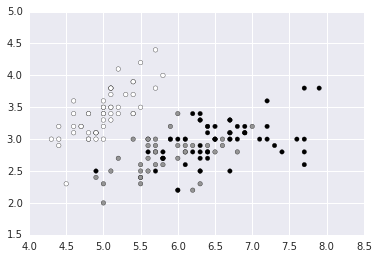

In [80]:
# Just so we can see some visuals here, let's do a scatter plot of the first two features against each other.
plt.scatter(dataset.data[:, 0], dataset.data[:, 1], c=dataset.target)

In [81]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

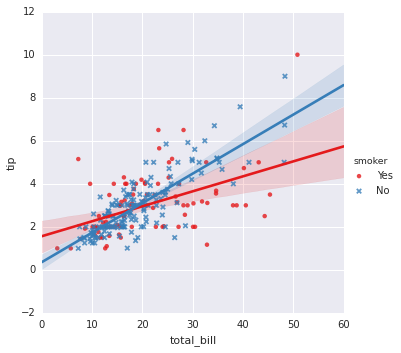

In [86]:
# Quick plotting example using seaborn
tips = sns.load_dataset("tips")
# type(tips) = pandas DataFrame
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"], palette="Set1")

In [84]:
# Converting our data to a pandas DataFrame so I can plot more easily in seaborn
data_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data_df['class'] = dataset.target
data_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


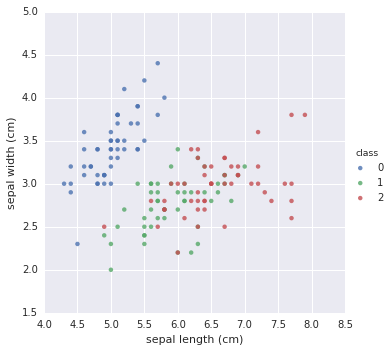

In [85]:
# Now, plotting using seaborn
ax = sns.lmplot(x="sepal length (cm)", y="sepal width (cm)", hue="class", data=data_df, fit_reg=False)